# 搭建CNN

In [1]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten , Dense ,Dropout
from keras import backend as K
from imutils import paths
from keras import applications
from keras.layers import Input, concatenate, GlobalAveragePooling2D
from keras.models import Model,load_model
from keras import regularizers
from keras.applications import ResNet50
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="2"  

base_model = ResNet50(input_shape=(512,512,3),include_top=False, weights='imagenet')


# # build a classifier model to put on top of the convolutional model
# top_model = Sequential()

# top_model.add(AveragePooling2D(input_shape=base_model.output_shape[1:]))
# # top_model.add(AveragePooling2D())
# top_model.add(Dense(512, activation='relu'))
# top_model.add(Dropout(0.5))
# top_model.add(Dense(12, activation='softmax'))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.5)(x)
prediction = Dense(12,activation='softmax')(x)
        
model = Model(inputs=base_model.input, outputs=prediction) 

/home/weijia.wu/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [119]:

zip([x.name for x in model.layers], range(len(model.layers)))

[('input_15', 0),
 ('conv1', 1),
 ('bn_conv1', 2),
 ('activation_687', 3),
 ('max_pooling2d_15', 4),
 ('res2a_branch2a', 5),
 ('bn2a_branch2a', 6),
 ('activation_688', 7),
 ('res2a_branch2b', 8),
 ('bn2a_branch2b', 9),
 ('activation_689', 10),
 ('res2a_branch2c', 11),
 ('res2a_branch1', 12),
 ('bn2a_branch2c', 13),
 ('bn2a_branch1', 14),
 ('add_225', 15),
 ('activation_690', 16),
 ('res2b_branch2a', 17),
 ('bn2b_branch2a', 18),
 ('activation_691', 19),
 ('res2b_branch2b', 20),
 ('bn2b_branch2b', 21),
 ('activation_692', 22),
 ('res2b_branch2c', 23),
 ('bn2b_branch2c', 24),
 ('add_226', 25),
 ('activation_693', 26),
 ('res2c_branch2a', 27),
 ('bn2c_branch2a', 28),
 ('activation_694', 29),
 ('res2c_branch2b', 30),
 ('bn2c_branch2b', 31),
 ('activation_695', 32),
 ('res2c_branch2c', 33),
 ('bn2c_branch2c', 34),
 ('add_227', 35),
 ('activation_696', 36),
 ('res3a_branch2a', 37),
 ('bn3a_branch2a', 38),
 ('activation_697', 39),
 ('res3a_branch2b', 40),
 ('bn3a_branch2b', 41),
 ('activation_

In [2]:
model.output.shape

TensorShape([Dimension(None), Dimension(12)])

In [3]:
model.layers[177].output

<tf.Tensor 'dense_2/Softmax:0' shape=(?, 12) dtype=float32>

# 声明全局变量

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import sys
sys.path.append('..')


# initialize the number of epochs to train for, initial learning rate,
# and batch size
EPOCHS = 50
INIT_LR = 1e-3
BS = 5
CLASS_NUM = 12
norm_size = 512



# 导入数据

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(path):
    print('[INFO] loading images...')
    data = []
    labels = []
    # grad the image paths and randomly shuffle them
    imagePaths = sorted(list(paths.list_images(path)))
#     print(imagePaths)
    random.seed(42)
    random.shuffle(imagePaths)
    # loop over the imput image 
    for imagePath in imagePaths:
        image = cv2.imread(imagePath)
#         print(image)
        image = cv2.resize(image, (norm_size,norm_size))
        image = img_to_array(image)
        data.append(image)
        
        # extract the class label from the image path and update the label list
        label = str(imagePath.split(os.path.sep)[-2])
#         print(label)
        labels.append(label)
        
    # scale the raw pixel intensities to the range(0,1)
    data = np.array(data,dtype="float") / 255.0
    labels = np.array(labels)
    
    labels = to_categorical(labels,num_classes=CLASS_NUM)
    return data,labels

def panda_data(label):
    number_list = label
    num_list = ['norm','defect1','defect2','defect3','defect4','defect5','defect6','defect7','defect8','defect9','defect10','defect11']
    plt.figure(figsize=(20,10))
    plt.bar(range(len(number_list)), number_list, tick_label = num_list)
    plt.show()
#     df = pd.DataFrame(
#     {'Number' : label}, 
#         index = ['norm','defect1','defect2','defect3','defect4','defect5','defect6','defect7','defect8','defect9','defect10','defect11'])
#     df.hist(grid=False,column="Number")


[INFO] loading images...


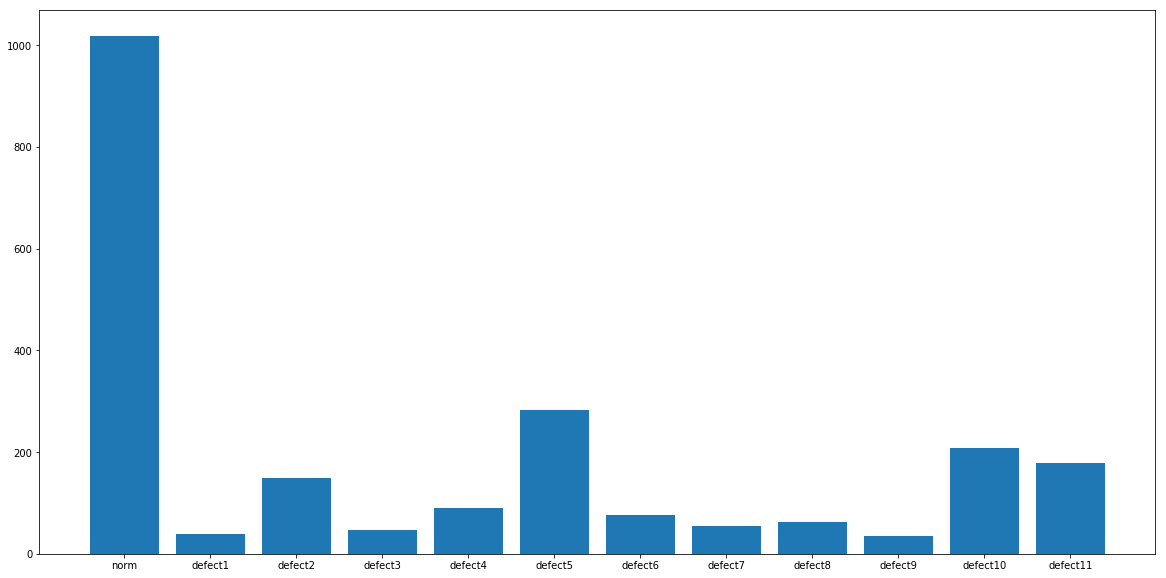

[1018.0, 39.0, 149.0, 47.0, 90.0, 282.0, 77.0, 54.0, 62.0, 35.0, 209.0, 178.0]


In [85]:
from imutils import paths
import random
import cv2

train_file_path = "/home/weijia.wu/workspace/Kaggle/rolled_steel/dataset_gray/train_data"
trainX,trainY = load_data(train_file_path)
col = map(sum,zip(*trainY))   #按列相加
panda_data(col)
print(col)

[INFO] loading images...


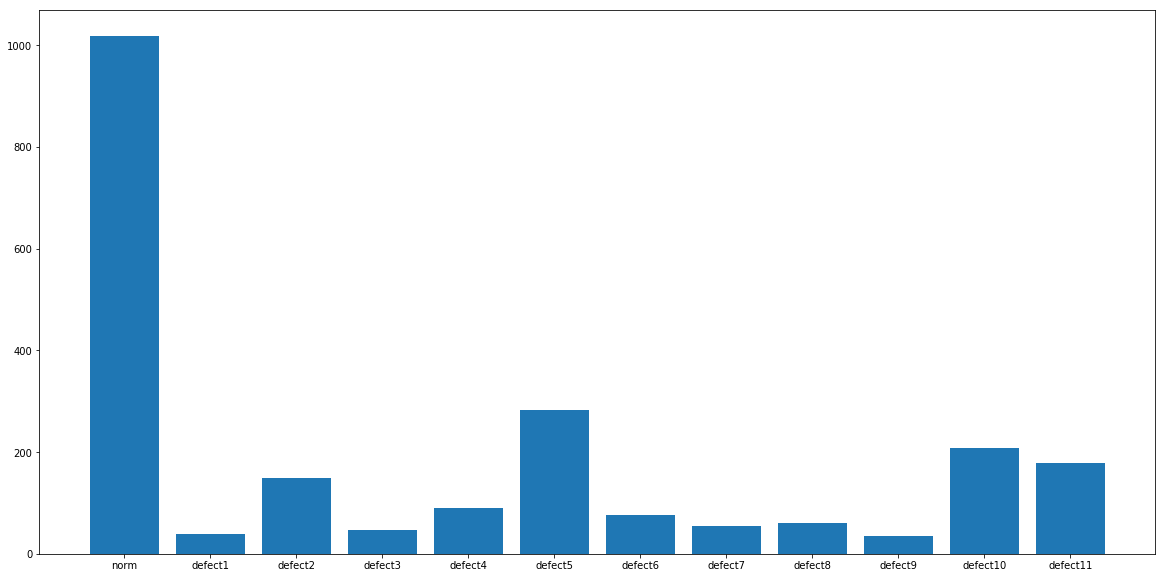

[1018.0, 39.0, 149.0, 47.0, 90.0, 282.0, 77.0, 54.0, 61.0, 35.0, 209.0, 178.0]


In [4]:
from imutils import paths
import random
import cv2

train_file_path = "/home/weijia.wu/workspace/Kaggle/rolled_steel/dataset_gray/train_data"
trainX,trainY = load_data(train_file_path)
col = map(sum,zip(*trainY))   #按列相加
panda_data(col)
print(col)

# 自定义评价函数

In [5]:
import tensorflow as tf
def metric_LB(y_true,y_pred):
    y_pred_label = K.argmax(y_pred,axis=-1)
    y_pred_ = K.one_hot(y_pred_label,num_classes=12)
    tp_fp = K.sum(y_pred_,axis=0)
    n = tf.count_nonzero(tp_fp,dtype='float32')
    tp = K.sum(y_true*y_pred_,axis=0)
    return K.sum(tp/(tp_fp+1e-6))/n

# 训练数据

In [15]:
from keras.callbacks import ReduceLROnPlateau

# 当评价指标不在提升时，减少学习率
reduce_lr = ReduceLROnPlateau(monitor='val_metric_LB', patience=5, mode='auto',factor=0.5,min_lr =0.5e-6)

def train(aug,trainX,trainY,testX,testY):
    # initialize the model
    print("[INFO] compiling model ...")
#     model = ResNet50(width=norm_size,height = norm_size,depth=3 , classes=CLASS_NUM)
#     opt = Adam(lr=INIT_LR,decay=INIT_LR / EPOCHS)
#     model.compile(loss="categorical_crossentropy", optimizer=opt,
#         metrics=["accuracy"])

    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4, decay=1e-6),
              metrics=['accuracy', metric_LB])
    #train the network
    print("[INFO] training network...")
    H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
        validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
        epochs=EPOCHS, verbose=1,callbacks=[checkpoint,reduce_lr],class_weight={0:1., 1:26.25806452, 2:6.832214, 3:21.42105263, 
                                                                                                                  4:11.30555556, 5:3.609929078, 6:13.12903226, 
                                                                                                                  7:18.85023256, 8:16.41917647, 9:29.07142857,
                                                                                                                  10:4.8742515 ,  11:5.7197011234 
                                                                                                                    })

    # save the model to disk
    print("[INFO] serializing network...")
    model.save('/home/weijia.wu/workspace/Kaggle/rolled_steel/dataset_gray/ResNet_rolled_stee2.model')
    
    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    N = EPOCHS
    plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
    plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
    plt.title("Training Loss and Accuracy on rolled_steel classifier")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig("/home/weijia.wu/workspace/Kaggle/rolled_steel/dataset_gray/ResNet_weijiawu_gray_2")

# 实时优化器

In [16]:
from keras.callbacks import ModelCheckpoint
filepath = '/home/weijia.wu/workspace/Kaggle/rolled_steel/dataset_gray/ResNet_weijiawu_gray_2.model'
checkpoint = ModelCheckpoint(
    filepath, 
    monitor='val_metric_LB', 
    verbose=0, 
    save_best_only=True, 
    save_weights_only=False, 
    mode='max', 
    period=1
)

# 导入数据并开始训练

In [20]:
model.load_weights("/home/weijia.wu/workspace/Kaggle/rolled_steel/dataset_gray/ResNet_weijiawu_gray_2.model")

[INFO] loading images...
[INFO] compiling model ...
[INFO] training network...
Epoch 1/50
359/358 [==============================] - 157s 437ms/step - loss: 1.6583 - acc: 0.8404 - metric_LB: 0.8188 - val_loss: 0.8299 - val_acc: 0.7500 - val_metric_LB: 0.7337
Epoch 2/50
359/358 [==============================] - 147s 409ms/step - loss: 1.9936 - acc: 0.8210 - metric_LB: 0.7877 - val_loss: 1.4295 - val_acc: 0.5804 - val_metric_LB: 0.5970
Epoch 3/50
359/358 [==============================] - 147s 409ms/step - loss: 2.3571 - acc: 0.8205 - metric_LB: 0.7933 - val_loss: 3.4129 - val_acc: 0.2924 - val_metric_LB: 0.3092
Epoch 4/50
359/358 [==============================] - 147s 410ms/step - loss: 1.6379 - acc: 0.8543 - metric_LB: 0.8345 - val_loss: 0.9947 - val_acc: 0.6496 - val_metric_LB: 0.6473
Epoch 5/50
359/358 [==============================] - 147s 410ms/step - loss: 1.3902 - acc: 0.8609 - metric_LB: 0.8362 - val_loss: 0.8938 - val_acc: 0.7299 - val_metric_LB: 0.7119
Epoch 6/50
359/358 [=

Epoch 46/50
359/358 [==============================] - 147s 410ms/step - loss: 0.1365 - acc: 0.9873 - metric_LB: 0.9835 - val_loss: 0.3520 - val_acc: 0.9442 - val_metric_LB: 0.9344
Epoch 47/50
359/358 [==============================] - 147s 411ms/step - loss: 0.1494 - acc: 0.9839 - metric_LB: 0.9768 - val_loss: 0.3521 - val_acc: 0.9420 - val_metric_LB: 0.9330
Epoch 48/50
359/358 [==============================] - 147s 411ms/step - loss: 0.1508 - acc: 0.9834 - metric_LB: 0.9786 - val_loss: 0.3538 - val_acc: 0.9442 - val_metric_LB: 0.9344
Epoch 49/50
359/358 [==============================] - 148s 411ms/step - loss: 0.1890 - acc: 0.9817 - metric_LB: 0.9768 - val_loss: 0.3507 - val_acc: 0.9442 - val_metric_LB: 0.9358
Epoch 50/50
359/358 [==============================] - 147s 410ms/step - loss: 0.1672 - acc: 0.9878 - metric_LB: 0.9833 - val_loss: 0.3509 - val_acc: 0.9464 - val_metric_LB: 0.9372
[INFO] serializing network...


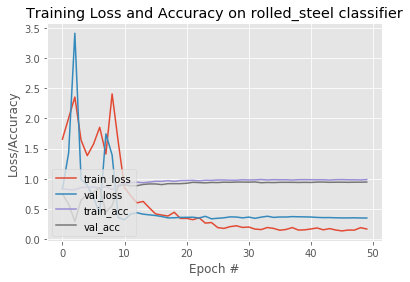

In [17]:
import os
from keras import optimizers
from sklearn.model_selection import train_test_split

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="1,2"  

if __name__=='__main__':
    train_file_path = "/home/weijia.wu/workspace/Kaggle/rolled_steel/dataset_gray/train_data"
    trainX,trainY = load_data(train_file_path)
    trainX,testX,trainY,testY= train_test_split(trainX,trainY,test_size=0.2,random_state=0)
#     construct the image generator for data augmentation
    aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
        height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
        horizontal_flip=True, fill_mode="nearest")
    train(aug,trainX,trainY,testX,testY)

# 交叉检验

# 绘制混淆矩阵

In [105]:
testY

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [124]:
test_Y = np.argmax(testY,axis=1)
test_Y

array([ 0,  0, 10,  0,  0,  6,  7, 11,  0,  0,  2,  3,  5,  0,  0,  0,  0,
        0,  3,  0,  9,  7,  0, 11,  3, 11,  0,  4,  0,  0,  0, 10, 11,  0,
        0,  0,  0,  5,  0,  0,  6, 11,  6,  0,  0, 10, 10,  8,  0,  0,  7,
        5, 10,  5,  0,  0,  4, 11,  1,  7,  0,  4, 11,  0,  5,  2,  5,  1,
        0,  0, 11, 10,  0, 11,  0,  6,  5,  7,  8,  5,  0,  0, 10,  5,  0,
        0,  5,  0,  5,  1,  0,  0,  0,  0, 10,  0,  0,  0,  5,  5, 10,  2,
        0, 10,  0,  0,  2, 11,  0,  0,  0,  2, 10,  3,  5,  0,  6, 11,  4,
        0, 10,  5,  0,  5,  0, 11,  8,  3,  0,  6,  0,  7,  2, 11,  0,  2,
       10,  1,  0,  2,  5,  8,  8,  0,  0,  3,  0, 11,  8,  0, 11,  0,  0,
       11,  0,  5,  0,  0, 11,  6, 10,  0,  4,  5, 11,  7,  2,  0,  0,  0,
        2,  0,  0,  2, 11, 10,  5,  6,  0,  0,  0,  7,  5,  8,  5,  0,  0,
        0,  4,  0,  4,  0,  2,  2, 11, 11,  0,  0,  0,  0,  0,  5,  0,  9,
        0,  2,  9,  1,  4,  0, 11,  4,  0,  0,  0,  0, 11, 11,  0, 10,  0,
        0,  0,  5,  0,  4

In [119]:
test_pre_Y = model.predict(testX)

In [120]:
test_pre_Y

array([[9.99999881e-01, 8.50909621e-12, 7.90378607e-09, ...,
        4.94235859e-12, 9.61847491e-10, 6.01917449e-08],
       [9.99999881e-01, 2.84481987e-11, 9.18024146e-09, ...,
        2.00599043e-12, 3.08143200e-08, 1.15540978e-07],
       [1.21562934e-07, 6.05261441e-09, 4.73682633e-07, ...,
        8.86650309e-09, 9.98947442e-01, 2.64180853e-04],
       ...,
       [1.36277505e-14, 4.33813641e-16, 1.00000000e+00, ...,
        2.88833106e-18, 1.42814453e-16, 9.24443716e-11],
       [1.66041381e-09, 1.79262681e-11, 2.15907014e-10, ...,
        3.05030605e-13, 3.62337182e-09, 1.08681525e-06],
       [1.37741121e-11, 3.34964769e-14, 4.66969345e-12, ...,
        2.07719516e-14, 8.86798013e-12, 1.41446898e-11]], dtype=float32)

In [121]:
test_pre_Y = np.argmax(test_pre_Y,axis=1)

In [122]:
test_pre_Y

array([ 0,  0, 10,  0,  0,  6,  7, 11,  0,  4, 11,  3,  5,  0,  0,  0,  0,
        0,  3,  0,  9,  7,  0, 11,  3, 10,  0,  4,  0,  0,  0, 10, 11,  0,
        0,  0,  0,  5,  0,  0,  6, 11,  6,  0,  0, 10, 10,  8,  0,  0,  7,
        5,  6,  5,  0,  0,  4, 11,  1,  7,  0,  4, 11,  0,  5,  2,  5,  1,
        0,  0, 11, 10,  0,  0,  0,  6,  5,  7,  8,  5,  0,  0, 10,  5,  0,
        0,  5,  0,  5,  1,  0,  0,  0,  0, 10,  0,  0,  0,  5,  5, 10,  2,
        0, 10, 10,  0,  2, 11,  0,  0,  0, 10, 10,  3,  5,  0,  6, 11,  4,
        0, 11,  5,  0,  5,  0, 11,  8,  3,  0,  6,  0,  7,  2, 11,  0,  2,
       10, 11,  0,  2,  5,  8,  8,  0,  0,  3,  0, 11,  8,  0, 11,  0,  0,
       11,  0,  5,  0,  0, 11,  6, 10,  0,  4,  5, 11,  7,  2,  0,  0,  0,
        2,  0,  0,  2, 11, 10,  5,  6,  0,  0,  0,  7,  5,  8,  5,  0,  0,
        0,  4,  0,  4,  0,  2,  2, 11,  6,  0,  0,  0,  0,  0,  5,  0,  9,
        0,  2,  9,  1,  4,  0, 11,  4,  0,  0,  0,  0, 11, 11,  0, 10,  0,
        0,  0,  5,  0,  4

In [146]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    tick_marks =np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh=cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
               plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [139]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_Y,y_pred=test_pre_Y)
cm

array([[195,   0,   0,   0,   1,   0,   0,   0,   0,   0,   1,   0],
       [  0,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,  29,   0,   0,   0,   0,   0,   0,   0,   1,   2],
       [  0,   0,   0,  12,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  16,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  48,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  19,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   0,   0,   0,  10,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  11,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   8,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   0,  41,   1],
       [  1,   0,   0,   0,   0,   0,   1,   0,   0,   0,   4,  35]])

Normalized confusion matrix
[[0.98984772 0.         0.         0.         0.00507614 0.
  0.         0.         0.         0.         0.00507614 0.        ]
 [0.         0.88888889 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.11111111]
 [0.         0.         0.90625    0.         0.         0.
  0.         0.         0.         0.         0.03125    0.0625    ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.9047619  0.         0.         0.         0.         0.0952381 ]
 [0.         0.         0.         0.         0.         0.
  0.     

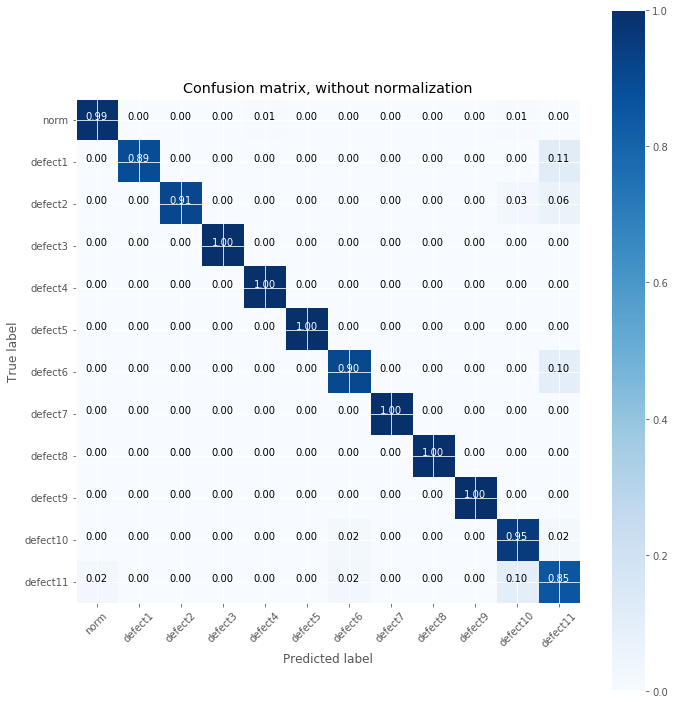

In [155]:
import itertools   #model  15
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_Y,y_pred=test_pre_Y)
class_names = ['norm','defect1','defect2','defect3','defect4','defect5',
               'defect6','defect7','defect8','defect9','defect10','defect11']
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=class_names,normalize=True,title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.98984772 0.         0.         0.         0.00507614 0.
  0.         0.         0.         0.         0.00507614 0.        ]
 [0.         0.88888889 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.11111111]
 [0.         0.         0.90625    0.         0.         0.
  0.         0.         0.         0.         0.03125    0.0625    ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.9047619  0.         0.         0.         0.         0.0952381 ]
 [0.         0.         0.         0.         0.         0.
  0.     

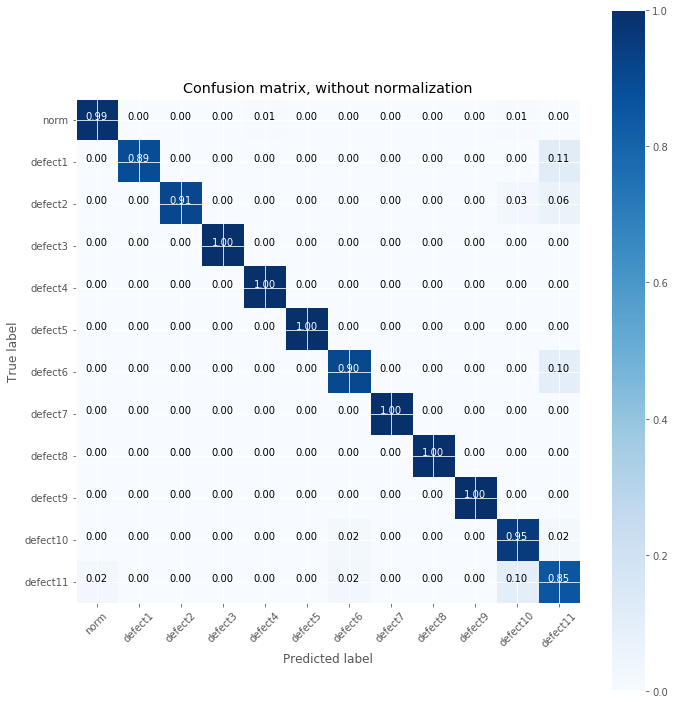

In [147]:
import itertools
class_names = ['norm','defect1','defect2','defect3','defect4','defect5',
               'defect6','defect7','defect8','defect9','defect10','defect11']
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=class_names,normalize=True,title='Confusion matrix, without normalization')

# 预测结果

In [21]:
import os
import cv2
path = "/home/weijia.wu/workspace/Kaggle/rolled_steel/dataset_gray/test_data/"
# model = load_model("/home/weijia.wu/workspace/Kaggle/rolled_steel/LeNet_Gangecai/traffic_sign.model")

#!/usr/bin/env python
# coding=utf-8
 
from xlwt import *
#需要xlwt库的支持
#import xlwt
file = Workbook(encoding = 'utf-8')
#指定file以utf-8的格式打开
table = file.add_sheet('data')
#指定打开的文件名
ImageId = []
Label = []
def test(args):
    image = cv2.imread(args)
    orig = image.copy()
    # pre-process the image for classification
    image = cv2.resize(image, (norm_size, norm_size))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
     
    # classify the input image
    result = model.predict(image)[0]
    proba = np.max(result)
    label = int(np.where(result==proba)[0])
    return label

files = os.listdir(path)

for i in files:
    result = test(path + i)
    ImageId.append(i)
    if result == 0:
        defa = 'norm'
    else:
        defa = 'defect' + str(result)
    Label.append(defa)
#     print(i , result)
#     print(defa)
          
print(ImageId)
print(Label)


['81.jpg', '132.jpg', '289.jpg', '166.jpg', '199.jpg', '3.jpg', '154.jpg', '76.jpg', '373.jpg', '185.jpg', '139.jpg', '14.jpg', '116.jpg', '236.jpg', '16.jpg', '265.jpg', '69.jpg', '181.jpg', '391.jpg', '151.jpg', '380.jpg', '164.jpg', '368.jpg', '68.jpg', '301.jpg', '410.jpg', '204.jpg', '381.jpg', '386.jpg', '388.jpg', '29.jpg', '438.jpg', '309.jpg', '228.jpg', '351.jpg', '34.jpg', '0.jpg', '294.jpg', '311.jpg', '307.jpg', '74.jpg', '45.jpg', '100.jpg', '360.jpg', '213.jpg', '394.jpg', '223.jpg', '316.jpg', '336.jpg', '260.jpg', '123.jpg', '21.jpg', '270.jpg', '104.jpg', '201.jpg', '149.jpg', '248.jpg', '197.jpg', '175.jpg', '382.jpg', '344.jpg', '308.jpg', '271.jpg', '238.jpg', '144.jpg', '324.jpg', '42.jpg', '89.jpg', '346.jpg', '52.jpg', '186.jpg', '28.jpg', '257.jpg', '312.jpg', '298.jpg', '375.jpg', '134.jpg', '216.jpg', '155.jpg', '117.jpg', '383.jpg', '63.jpg', '87.jpg', '396.jpg', '229.jpg', '84.jpg', '124.jpg', '200.jpg', '162.jpg', '356.jpg', '46.jpg', '419.jpg', '137.jpg',

In [22]:
import pandas as pd
submissions=pd.DataFrame({"ImageId": ImageId,
                         "Label": Label})
submissions.to_csv("/home/weijia.wu/workspace/Kaggle/rolled_steel/dataset_gray/DR2.csv", index=False, header=None)

# CAM

In [13]:
def visualize_grid(Xs, ubound=255.0, padding=1):
    """
    Reshape a 4D tensor of image data to a grid for easy visualization.

    Inputs:
    - Xs: Data of shape (N, H, W, C)
    - ubound: Output grid will have values scaled to the range [0, ubound]
    - padding: The number of blank pixels between elements of the grid
    """
    (N, H, W, C) = Xs.shape
    grid_size = int(ceil(sqrt(N)))
    grid_height = H * grid_size + padding * (grid_size - 1)
    grid_width = W * grid_size + padding * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width, C))
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = Xs[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0:y1, x0:x1] = ubound * (img - low) / (high - low)
                # grid[y0:y1, x0:x1] = Xs[next_idx]
                next_idx += 1
            x0 += W + padding
            x1 += W + padding
        y0 += H + padding
        y1 += H + padding
    # grid_max = np.max(grid)
    # grid_min = np.min(grid)
    # grid = ubound * (grid - grid_min) / (grid_max - grid_min)
    return grid

In [ ]:


grid = visualize_grid(model.params['W1'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()